In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
#====================================================================
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'D:\new project\Accident Severity Prediction\RTA Dataset.csv\RTA Dataset.csv')

In [6]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [7]:
df.shape

(12316, 32)

In [8]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [9]:
df.describe(include="all")

Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   
mean         NaN         NaN                NaN           NaN   
std          NaN         NaN                NaN           NaN   
min          NaN         NaN                NaN           NaN   
25%          NaN         NaN                NaN           NaN   
50%          NaN         NaN                NaN           NaN   
75%          NaN         NaN                NaN           NaN   
max          NaN         NaN                NaN           NaN   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   
mean                   NaN                     NaN                NaN   
std                    NaN                     NaN                NaN   
min                    NaN                     NaN                NaN   
25%                    NaN                     NaN                NaN   
50%                    NaN                     NaN                NaN   
75%                    NaN                     NaN                NaN   
max                    NaN                     NaN                NaN   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
count            11366            11834                    8388  ...   
unique              17                4                       6  ...   
top         Automobile            Owner                 Unknown  ...   
freq              3205            10459                    2883  ...   
mean               NaN              NaN                     NaN  ...   
std                NaN              NaN                     NaN  ...   
min                NaN              NaN                     NaN  ...   
25%                NaN              NaN                     NaN  ...   
50%                NaN              NaN                     NaN  ...   
75%                NaN              NaN                     NaN  ...   
max                NaN              NaN                     NaN  ...   

       Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
count             12008            12316           12316                12316   
unique               13                4               3                    6   
top      Going straight  Driver or rider            Male                   na   
freq               8158             4944            5253                 4443   
mean                NaN              NaN             NaN                  NaN   
std                 NaN              NaN             NaN                  NaN   
min                 NaN              NaN             NaN                  NaN   
25%                 NaN              NaN             NaN                  NaN   
50%                 NaN              NaN             NaN                  NaN   
75%                 NaN              NaN             NaN                  NaN   
max                 NaN              NaN             NaN                  NaN   

       Casualty_severity Work_of_casuality Fitness_of_casuality  \
count              12316              9118                 9681   
unique                 4                 7                    5   
top                    3            Driver               Normal   
freq                7076              5903                 9608   
mean                 NaN               NaN                  NaN   
std                  NaN               NaN                  NaN   
min                  NaN               NaN     

In [10]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [11]:
df['Time']= pd.to_datetime(df['Time'])

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

In [13]:
df.duplicated().sum()

0

In [14]:
df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

In [15]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

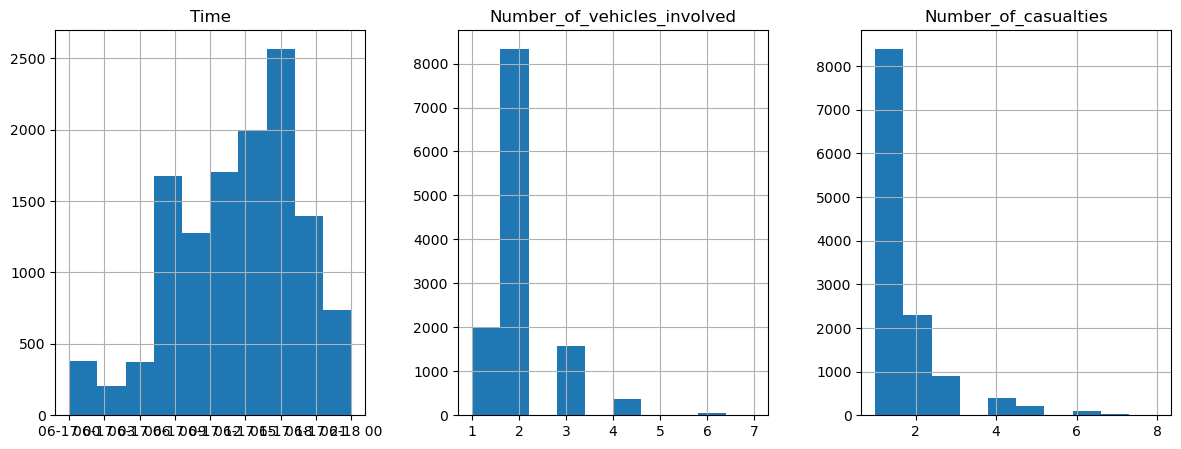

In [16]:
df.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [17]:
df['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

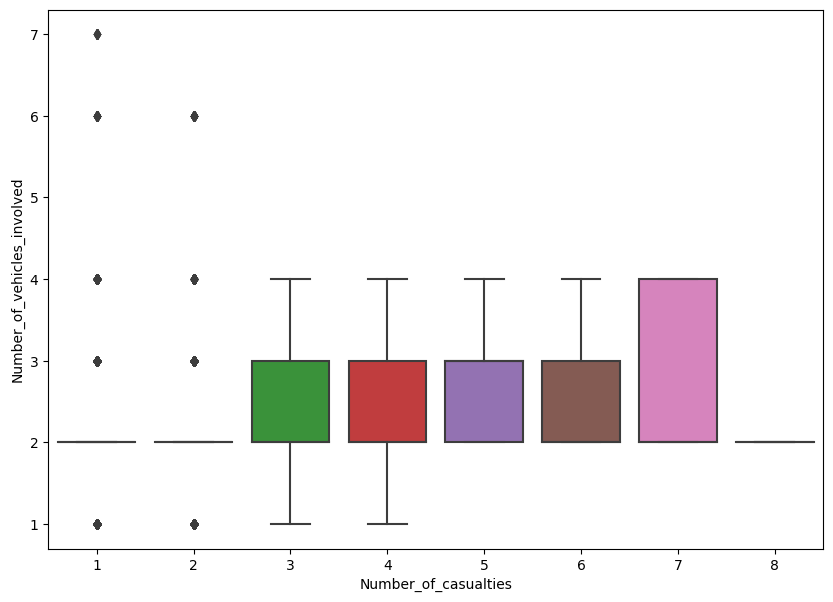

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

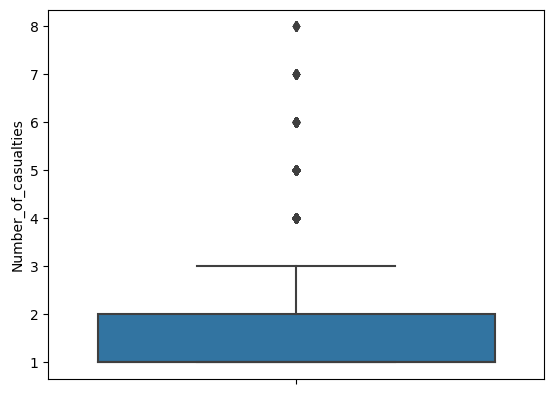

In [19]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

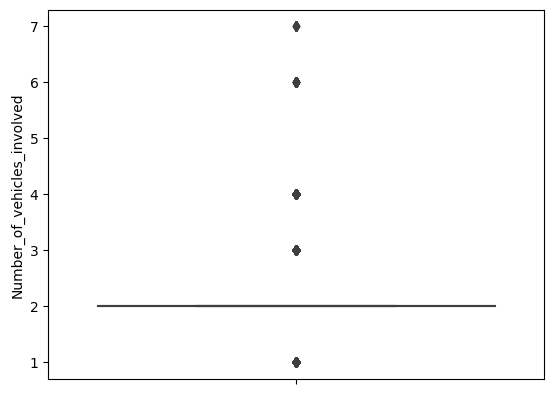

In [20]:
sns.boxplot(data=df, y='Number_of_vehicles_involved')
plt.show()

In [21]:
df['Number_of_vehicles_involved']

0        2
1        2
2        2
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Number_of_vehicles_involved, Length: 12316, dtype: int64

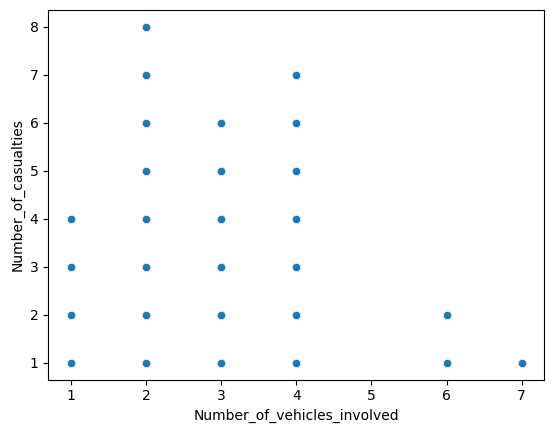

In [22]:
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

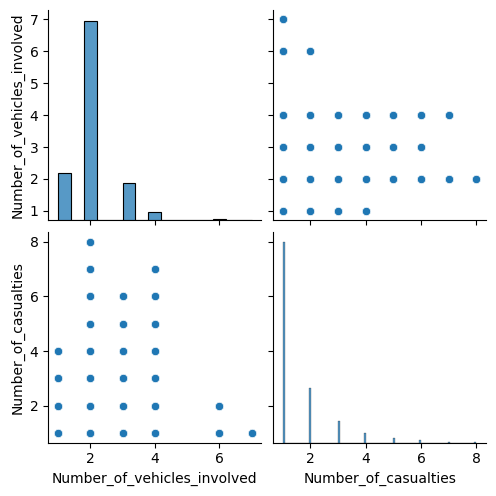

In [23]:
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

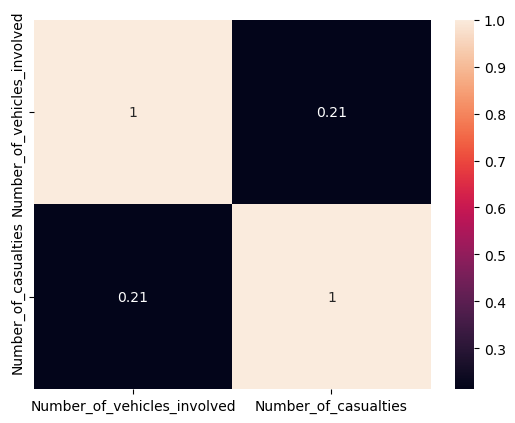

In [24]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

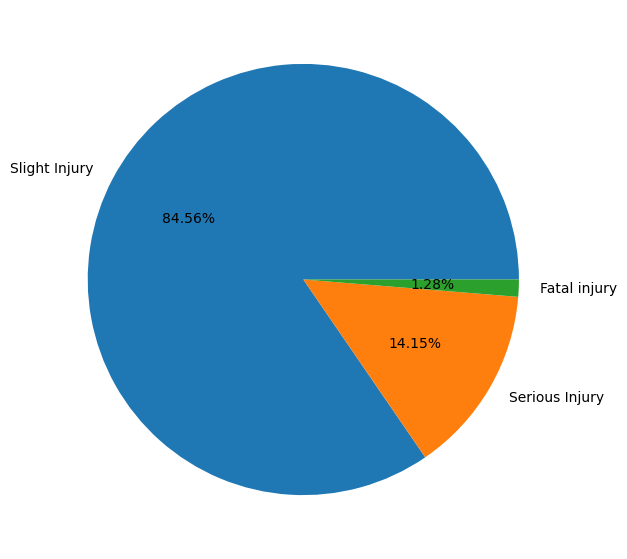

In [25]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

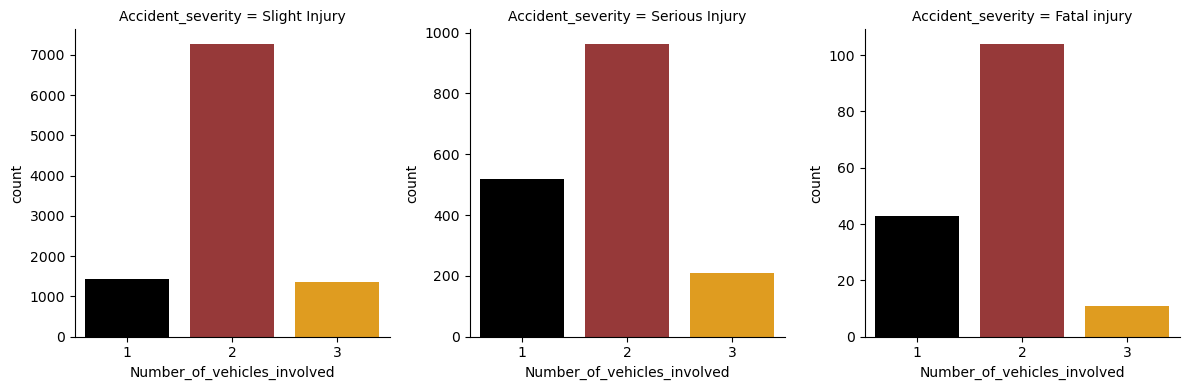

In [26]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

In [27]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [28]:
# dropping columns that can cause imbalance while imputation
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Day_of_week','Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [29]:
df.shape

(12316, 19)

In [30]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [38]:
df

Age_band_of_driver  Driving_experience  Type_of_vehicle  \
0                       0                   0                0   
1                       1                   3               11   
2                       0                   0                5   
3                       0                   2               11   
4                       0                   1                0   
...                   ...                 ...              ...   
12311                   1                   1                4   
12312                   4                   2                0   
12313                   2                   2                1   
12314                   0                   3                5   
12315                   0                   2                7   

       Area_accident_occured  Lanes_or_Medians  Road_allignment  \
0                          9                 2                5   
1                          6                 4                5   
2                          1                 6                5   
3                          6                 6                6   
4                          4                 6                5   
...                      ...               ...              ...   
12311                      5                 4                5   
12312                      5                 2                0   
12313                      5                 2                7   
12314                      6                 4                7   
12315                      5                 4                7   

       Types_of_Junction  Road_surface_conditions  Light_conditions  \
0                      1                        0                 3   
1                      1                        0                 3   
2                      1                        0                 3   
3                      7                        0                 0   
4                      7                        0                 0   
...                  ...                      ...               ...   
12311                  1                        0                 3   
12312                  1                        0                 3   
12313                  1                        0                 3   
12314                  1                        0                 0   
12315                  2                        0                 0   

       Weather_conditions  Type_of_collision  Number_of_vehicles_involved  \
0                       2                  3                            1   
1                       2                  8                            1   
2                       2                  2                            1   
3                       2                  8                            1   
4                       2                  8                            1   
...                   ...                ...                          ...   
12311                   2                  8                            1   
12312                   2                  8                            1   
12313                   2                  8                            0   
12314                   2                  8                            1   
12315                   2                  8                            1   

       Number_of_casualties  Vehicle_movement  Casualty_class  \
0                         1                 2               3   
1                         1                 2               3   
2                         1                 2               0   
3                         1                 2               2   
4                         1                 2               3   
...                     ...               ...             ...   
12311                     0                 2               3   
12312                     0                 4               3   
12313                     0                 4 

In [31]:
# fill missing values with mean column values
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [32]:
df.isnull().sum()

Age_band_of_driver             0
Driving_experience             0
Type_of_vehicle                0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Age_band_of_casualty           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


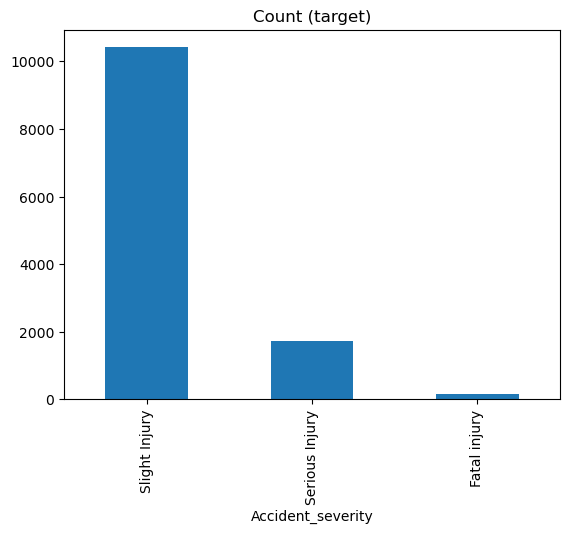

In [33]:
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [34]:
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)   

<Axes: >

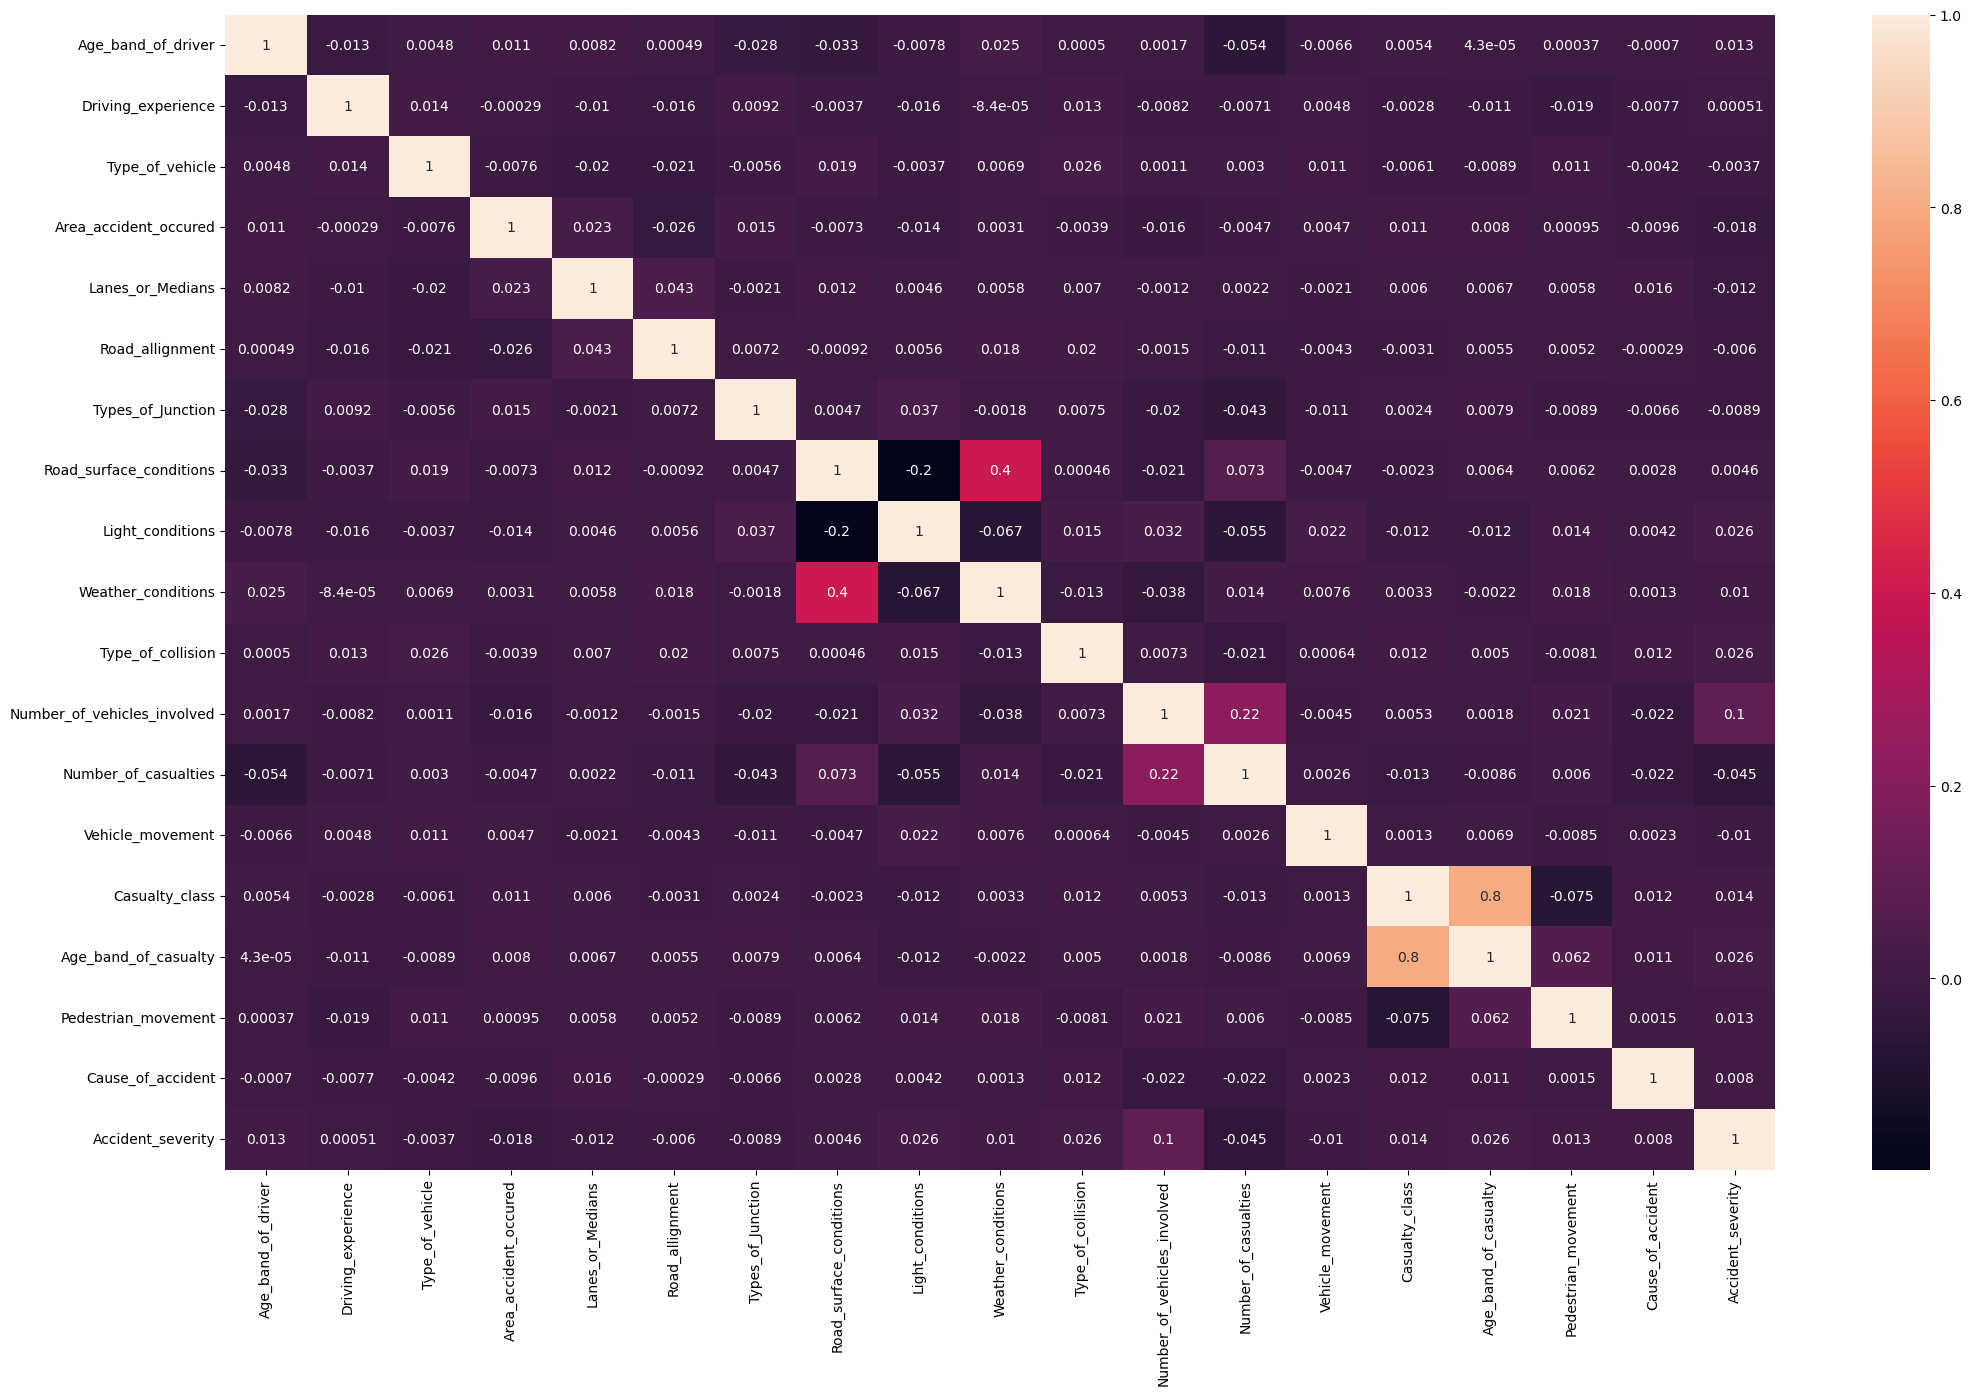

In [35]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

In [36]:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']


In [37]:
X

Age_band_of_driver  Driving_experience  Type_of_vehicle  \
0                       0                   0                0   
1                       1                   3               11   
2                       0                   0                5   
3                       0                   2               11   
4                       0                   1                0   
...                   ...                 ...              ...   
12311                   1                   1                4   
12312                   4                   2                0   
12313                   2                   2                1   
12314                   0                   3                5   
12315                   0                   2                7   

       Area_accident_occured  Lanes_or_Medians  Road_allignment  \
0                          9                 2                5   
1                          6                 4                5   
2                          1                 6                5   
3                          6                 6                6   
4                          4                 6                5   
...                      ...               ...              ...   
12311                      5                 4                5   
12312                      5                 2                0   
12313                      5                 2                7   
12314                      6                 4                7   
12315                      5                 4                7   

       Types_of_Junction  Road_surface_conditions  Light_conditions  \
0                      1                        0                 3   
1                      1                        0                 3   
2                      1                        0                 3   
3                      7                        0                 0   
4                      7                        0                 0   
...                  ...                      ...               ...   
12311                  1                        0                 3   
12312                  1                        0                 3   
12313                  1                        0                 3   
12314                  1                        0                 0   
12315                  2                        0                 0   

       Weather_conditions  Type_of_collision  Number_of_vehicles_involved  \
0                       2                  3                            1   
1                       2                  8                            1   
2                       2                  2                            1   
3                       2                  8                            1   
4                       2                  8                            1   
...                   ...                ...                          ...   
12311                   2                  8                            1   
12312                   2                  8                            1   
12313                   2                  8                            0   
12314                   2                  8                            1   
12315                   2                  8                            1   

       Number_of_casualties  Vehicle_movement  Casualty_class  \
0                         1                 2               3   
1                         1                 2               3   
2                         1                 2               0   
3                         1                 2               2   
4                         1                 2               3   
...                     ...               ...             ...   
12311                     0                 2               3   
12312                     0                 4               3   
12313                     0                 4 

In [57]:
y

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Accident_severity, Length: 12316, dtype: int32

In [40]:
data["Age_band_of_driver"].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [41]:
data["Driving_experience"].value_counts()

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

In [43]:
data["Type_of_vehicle"].value_counts()

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [44]:
data["Area_accident_occured"].value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [45]:
data["Lanes_or_Medians"].value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64

In [46]:
data["Road_allignment"].value_counts()

Road_allignment
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64

In [47]:
data["Types_of_Junction"].value_counts()

Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

In [48]:
data["Road_surface_conditions"].value_counts()

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64

In [50]:
data["Light_conditions"].value_counts()

Light_conditions
Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: count, dtype: int64

In [51]:
data["Weather_conditions"].value_counts()

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

In [52]:
data["Type_of_collision"].value_counts()

Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [53]:
data["Number_of_vehicles_involved"].value_counts()

Number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64

In [54]:
data["Number_of_casualties"].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

In [55]:
data["Vehicle_movement"].value_counts()

Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64

In [56]:
data["Casualty_class"].value_counts()

Casualty_class
Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: count, dtype: int64

In [58]:
data["Age_band_of_casualty"].value_counts()

Age_band_of_casualty
na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64

In [59]:
data["Pedestrian_movement"].value_counts()

Pedestrian_movement
Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                             

In [60]:
data["Cause_of_accident"].value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: count, dtype: int64

In [61]:
data["Accident_severity"].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

In [49]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=135)

# Instantiate and train the Logistic Regression model
classimodel = LogisticRegression()  
classimodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = classimodel.score(X_train, y_train)
testscore = classimodel.score(X_test, y_test)

# Make predictions
y_pred = classimodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.777336171853338
Confusion matrix:
[[   0    0   36]
 [   0    0  434]
 [   0    0 2609]]


In [62]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Instantiate and train the RandomForest model
RFmodel = RandomForestClassifier()  
RFmodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = RFmodel.score(X_train, y_train)
testscore = RFmodel.score(X_test, y_test)

# Make predictions
y_pred = RFmodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.777537080220352
Confusion matrix:
[[   0    0   46]
 [   0   14  429]
 [   0   10 2580]]


In [63]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Instantiate and train the SVM model
SVMmodel = SVC()  # You can specify kernel='linear', 'poly', 'rbf', etc., if needed
SVMmodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = SVMmodel.score(X_train, y_train)
testscore = SVMmodel.score(X_test, y_test)

# Make predictions
y_pred = SVMmodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.7686230034275285
Confusion matrix:
[[   0    0   46]
 [   0    0  443]
 [   0    0 2590]]


In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Instantiate and train the GaussianNB model
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = NBmodel.score(X_train, y_train)
testscore = NBmodel.score(X_test, y_test)

# Make predictions
y_pred = NBmodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.7661835662322835
Confusion matrix:
[[   1    0   45]
 [   3    5  435]
 [  30   14 2546]]


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Instantiate and train the DecisionTreeClassifier model
DTmodel = DecisionTreeClassifier(random_state=110)  # You can specify other parameters if needed
DTmodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = DTmodel.score(X_train, y_train)
testscore = DTmodel.score(X_test, y_test)

# Make predictions
y_pred = DTmodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.7501972062043435
Confusion matrix:
[[  11    2   33]
 [   9  114  320]
 [  27  401 2162]]


In [66]:
import joblib

# Save the model to a file with a .pkl extension
joblib.dump(RFmodel, 'Accident.pkl')

['Accident.pkl']